# (Loan Data from Prosper)
## by (Yaman Al Jaghbir)

## Preliminary Wrangling

"This data set contains 113,937 loans with 81 variables on each 
loan, including loan amount, borrower rate (or interest rate), 
current loan status, borrower income, and many others."

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
prosper_raw_df = pd.read_csv("prosperLoanData.csv")
prosper_raw_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
prosper_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

I checked the Variable Definitions of the columns, and found there is a difference in the fetures that being required "before 2009" and "on and after 2009".
As I am intending to use "ProsperRating" and "ProsperScore" in my exploration, and they are only available for the after 2009 data I will remove all records that don't have them. (84853 / 113936 = 74.5%) of the records are kept.

In [4]:
prosper_raw_df.dropna(axis=0,subset=["ProsperScore"],inplace = True)

ListingKey, ListingNumber, LoanKey are all supposed to be unique identifier.
If we check them out:

In [5]:
#If all records have a unique number we should get 0.
# any other number indicate the number of repeated values
len(prosper_raw_df) - prosper_raw_df.ListingKey.nunique()

871

In [6]:
#if all three variables gave the same number of unique values then, then the repeated records are the same 
#for all of them
print(prosper_raw_df.ListingKey.nunique() == prosper_raw_df.ListingNumber.nunique() == prosper_raw_df.LoanKey.nunique())
print(prosper_raw_df.ListingKey.nunique(), " of ", len(prosper_raw_df), " are unique")

True
83982  of  84853  are unique


In [7]:
#droping the repeated records. I will keep the last record.
prosper_raw_df.drop_duplicates(subset=["ListingKey"], keep='last', inplace=True)

In [8]:
#check
len(prosper_raw_df) - prosper_raw_df.ListingKey.nunique()

0

### What is the structure of your dataset?

> The data size is 113937 rows by 81 columns.
I will not be exploring all the features as there are many of them. My exploration will be limited to 10 features, that at least have two categorical and two numeric features.

> Explanation of the data in each column/varaible can be found [here (Google Sheet File)](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)


### What is/are the main feature(s) of interest in your dataset?

> Ii am interested in to know what features affect the "loan status". To predict which loans will be completed, defaulted, or cancelled. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will be looking on these features (ordered by appearance):
> 
>1.  Term
2.  LoanStatus
3.  BorrowerAPR
4.  ProsperRating (numeric)
5.  ProsperRating (Alpha)
6.  EmploymentStatus
7.  EmploymentStatusDuration
8.  IsBorrowerHomeowner
9.  DebtToIncomeRatio
10. IncomeRange
11. LoanOriginalAmount

> I didn't consider CreditScore or ProsperScore though they might be important because they are covered in the ProsperRating. According to their website [(link)](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline):
>"The estimated base loss rate is determined by two scores: (1) the borrower's credit score, obtained from an official credit reporting agency, and (2) the Prosper Score, figured in-house based on the Prosper population."
> The base loss rate determines the the ProsperRating

| Prosper Rating | Estimated Avg. Annual Loss Rate |
|:--------------:|:---------------------------------:|
| AA            | 0.00-1.99%                        |
| A             | 2.00–3.99%                        |
| B             | 4.00–5.99%                        |
| C             | 6.00–8.99%                        |
| D             | 9.00–11.99%                       |
| E             | 12.00–14.99%                      |
| HR            | ≥ 15.00%                          |


In [9]:
# createing the dataframe with the features that will be use 
prosper_df = prosper_raw_df.loc[:,[
    'LoanStatus',
    'BorrowerAPR',
    'ProsperRating (numeric)',
    'ProsperRating (Alpha)',
    'LoanOriginalAmount',
    'Term',
    'IsBorrowerHomeowner',
    'EmploymentStatus',
    'EmploymentStatusDuration',
    'DebtToIncomeRatio',
    'IncomeRange',
]]

In [10]:
prosper_df.rename(columns = {'ProsperRating (numeric)':'ProsperRatingNum','ProsperRating (Alpha)':'ProsperRating'},inplace=True)

In [11]:
prosper_df.head()

,LoanStatus,BorrowerAPR,ProsperRatingNum,ProsperRating,LoanOriginalAmount,Term,IsBorrowerHomeowner,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange
1,Current,0.12016,6.0,A,10000,36,False,Employed,44.0,0.18,"$50,000-74,999"
3,Current,0.12528,6.0,A,10000,36,True,Employed,113.0,0.15,"$25,000-49,999"
4,Current,0.24614,3.0,D,15000,36,True,Employed,44.0,0.26,"$100,000+"
5,Current,0.15425,5.0,B,15000,60,True,Employed,82.0,0.36,"$100,000+"
6,Current,0.31032,2.0,E,3000,36,False,Employed,172.0,0.27,"$25,000-49,999"


In [12]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 11 columns):
LoanStatus                  83982 non-null object
BorrowerAPR                 83982 non-null float64
ProsperRatingNum            83982 non-null float64
ProsperRating               83982 non-null object
LoanOriginalAmount          83982 non-null int64
Term                        83982 non-null int64
IsBorrowerHomeowner         83982 non-null bool
EmploymentStatus            83982 non-null object
EmploymentStatusDuration    83963 non-null float64
DebtToIncomeRatio           76768 non-null float64
IncomeRange                 83982 non-null object
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 7.1+ MB


In [13]:
prosper_df.IncomeRange.value_counts()

$50,000-74,999    25326
$25,000-49,999    23923
$100,000+         15056
$75,000-99,999    14362
$1-24,999          4621
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [14]:
prosper_df.IncomeRange.replace({
    '$0':'undisclosed',
    '$1-24,999':'$0-25k',
    '$25,000-49,999':'$25-50k',
    '$50,000-74,999':'$50-75k',
    '$75,000-99,999':'$75-100k',
    '$100,000+':'>$100k'
}, inplace=True)

In [15]:
prosper_df.IncomeRange.value_counts()

$50-75k         25326
$25-50k         23923
>$100k          15056
$75-100k        14362
$0-25k           4621
Not employed      649
undisclosed        45
Name: IncomeRange, dtype: int64

In [111]:
IncomeRange_classes = ['Not employed','undisclosed','$0-25k','$25-50k','$50-75k','$75-100k','>$100k']
IncomeRange_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = IncomeRange_classes)
prosper_df['IncomeRange'] = prosper_df['IncomeRange'].astype(IncomeRange_cat)

In [16]:
prosper_df.LoanStatus.value_counts()

Current                   55730
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

As my main objective from this exploration is to predict the Loan Satus, will it Default or be completed I will need to rearrange the status as following:
- Past Due: All past due incident will be grouped under this title
- Defaulted: Under it will be Chargedoff and Defaulted
- Completed: Under it will have Completed and FinalPaymentInProgress
- To remove: Current as it doesn't help in my exploration.



In [17]:
#removing records with "Current" LoanStatus
filt = prosper_df['LoanStatus'] != 'Current' 
prosper_df = prosper_df[filt] 

In [18]:
prosper_df.replace(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
                    'Past Due (91-120 days)','Past Due (>120 days)'],'PastDue',inplace=True)

In [19]:
prosper_df.replace(['Chargedoff'],'Defaulted',inplace=True)

In [20]:
prosper_df.replace(['FinalPaymentInProgress'],'Completed',inplace=True)

In [21]:
prosper_df.LoanStatus.value_counts()

Completed    19854
Defaulted     6341
PastDue       2057
Name: LoanStatus, dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [123]:
# I will setup a function that will be used frequntly to show percentage
# above countplots bars.

def show_annot(col,df = prosper_df,displacement = -250, font_color='w' ):
    '''
    show percentage annotation above the bars on a countplot graph
    col: column name

    '''
    # The code below is taken from Udacity.
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[col].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count+displacement, pct_string, ha = 'center', color = font_color)   

We will start at plotting the distribution, as a frequencey bars, for the main dependent varaible I am invetigating, Loan Status.

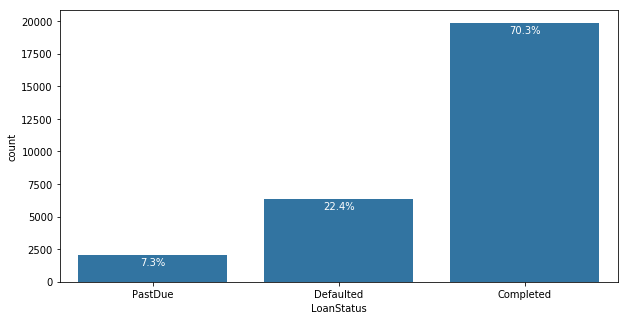

In [130]:
# create the plot
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, x = 'LoanStatus',color=base_color)

show_annot('LoanStatus',displacement = -800)

Most of the loans are Completed,
Around quarter is Defaulted.
I am treating PastDue as potential to default loans.

Next will check what I consider the most important dependent  varaible, though its effect will analyzed as part of this analysis, the **BorrowerAPR**.
A histogram will be used.

(array([0.000e+00, 0.000e+00, 5.700e+01, 6.870e+02, 8.170e+02, 1.119e+03,
        1.745e+03, 9.770e+02, 1.727e+03, 1.185e+03, 1.601e+03, 1.852e+03,
        1.871e+03, 1.582e+03, 3.046e+03, 2.008e+03, 1.374e+03, 5.292e+03,
        6.550e+02, 5.830e+02, 7.300e+01, 1.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44]),
 <a list of 22 Patch objects>)

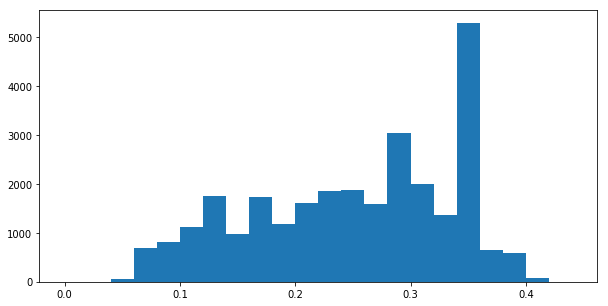

In [23]:
plt.figure(figsize=(10,5))
bin_edges = np.arange(0, prosper_df.BorrowerAPR.max()+0.02, 0.02)
plt.hist(prosper_df.BorrowerAPR,bins=bin_edges)

(0.34, 0.36)

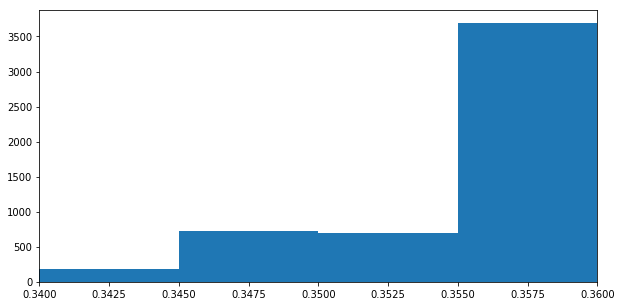

In [24]:
plt.figure(figsize=(10,5))
bin_edges = np.arange(0, prosper_df.BorrowerAPR.max()+0.005, 0.005)
plt.hist(prosper_df.BorrowerAPR,bins=bin_edges)
plt.xlim(0.34,0.36)

Next will plot **Prosper Rating**.
Will plot the standard aphapbital rating. Will redefine the column type as an oreder categoty, and will be arranged from worst (HR: High Risk) to the highest (AA the safest), this is to in same order as numbered proseper rating from 1 to 7.

In [26]:
#creating ordered categoty type for ProsperRating
ProsperRating_classes = ['HR','E','D','C','B','A','AA']
rating_alpha_classes =  pd.api.types.CategoricalDtype(ordered=True, categories = ProsperRating_classes)
prosper_df['ProsperRating'] = prosper_df['ProsperRating'].astype(rating_alpha_classes)

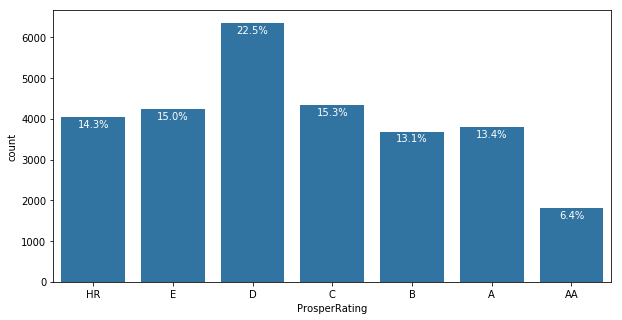

In [132]:
# create the plot
plt.figure(figsize=(10,5))
sb.countplot(data = prosper_df, x = 'ProsperRating',color=base_color)

show_annot('ProsperRating', displacement = -250)

All nearly arounf 15%m except for D and AA,

**Loan Original Amount**

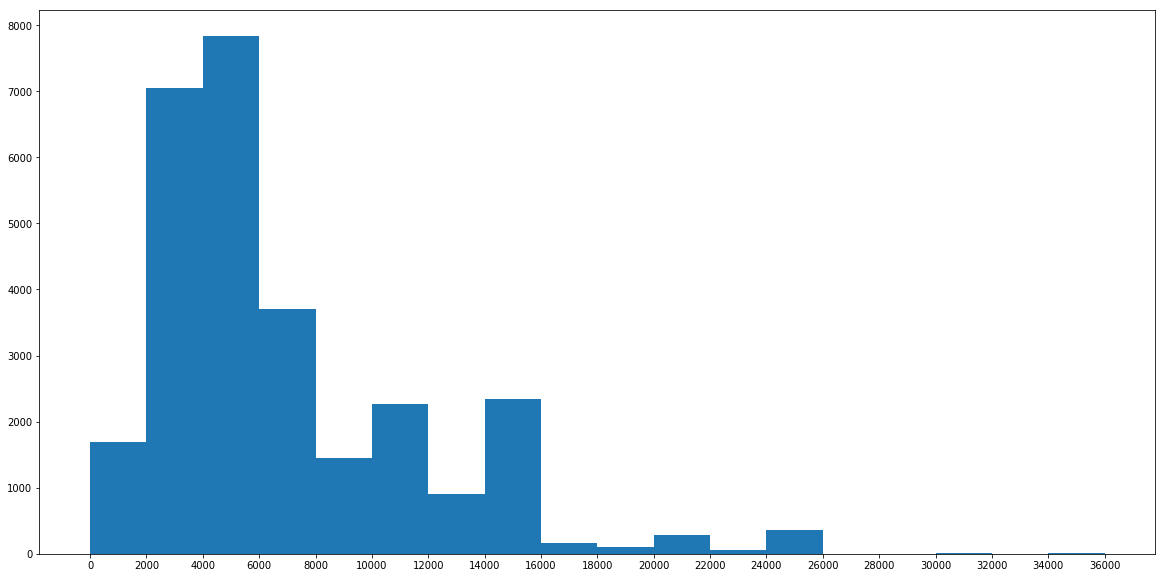

In [43]:
plt.figure(figsize=(20,10))

bin_edges = np.arange(0, prosper_df.LoanOriginalAmount.max()+2000+.1, 2000)
plt.hist(prosper_df.LoanOriginalAmount,bins=bin_edges)
plt.xticks(np.arange(0, prosper_df.LoanOriginalAmount.max()+2000, 2000));



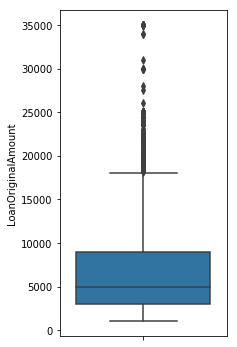

In [50]:
plt.figure(figsize=(3,6))
sb.boxplot(data = prosper_df, y = 'LoanOriginalAmount');

### Term, IsBorrowerHomeowner, EmploymentStatus: Subplots

Will look now at three variables and put them on subplots. The variables are: **Term, IsBorrowerHomeowner, EmploymentStatus**

I know that Term and IsBorrowerHomeowner have limited categories.
How ever there are several categories for EmploymentStatus.

In [103]:
#Exporing EmploymentStatus categories
prosper_df.EmploymentStatus.value_counts()

Employed         24970
Self-employed     1451
Other              923
Not employed       401
Retired            275
Part-time          232
Name: EmploymentStatus, dtype: int64

I don't think there is a the difference between Full-Time and Employed. I will  assume they are the same and I will merge them together.

In [105]:
#Cahnging all Full-Time status to Employed status
prosper_df.EmploymentStatus.replace('Full-time', 'Employed',inplace=True)

Text(0, 0.5, 'count')

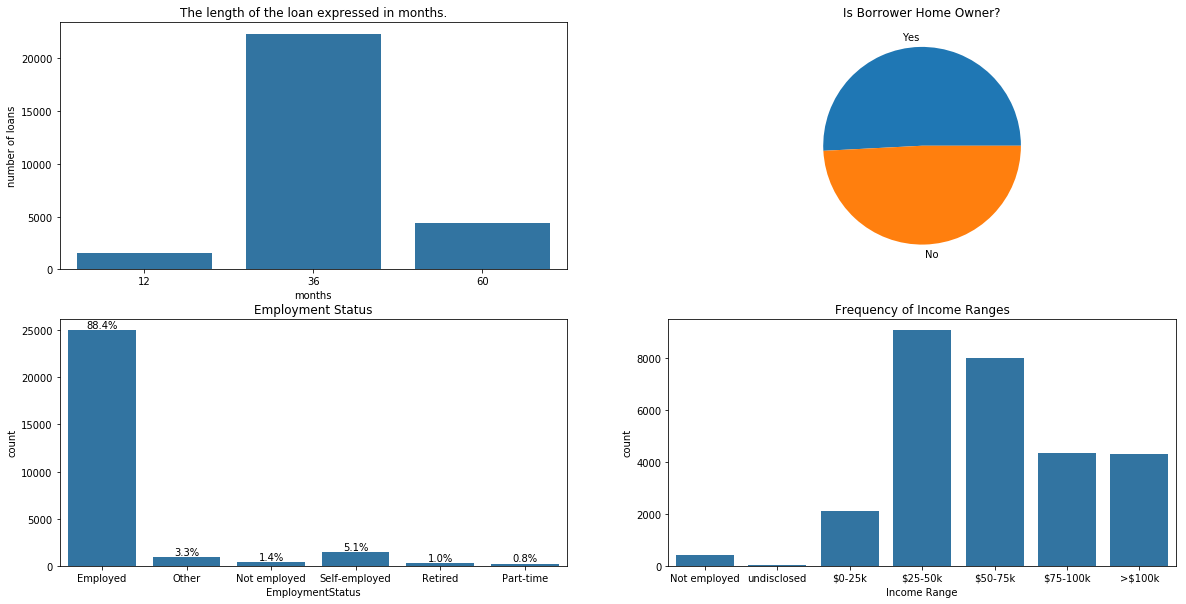

In [125]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
sb.countplot(data = prosper_df, x = 'Term',color=base_color)
plt.title('The length of the loan expressed in months.')
plt.xlabel("months")
plt.ylabel("number of loans")

plt.subplot(2, 2, 2)
home_owners = prosper_df['IsBorrowerHomeowner'].value_counts()
plt.pie(home_owners, labels = ['Yes','No']);
plt.title('Is Borrower Home Owner?')

plt.subplot(2, 2, 3)
sb.countplot(data = prosper_df, x = 'EmploymentStatus', color=base_color);
plt.title('Employment Status')
show_annot('EmploymentStatus',font_color='black',displacement=250)

plt.subplot(2, 2, 4)
sb.countplot(data = prosper_df, x = 'IncomeRange',color=base_color)
plt.title('Frequency of Income Ranges')
plt.xlabel("Income Range")
plt.ylabel("count")

**Term**
Most of the borrows are going with 3 years loan, then with 5 years with big difference from 3 years. The 5 years in nearly the double of 1 year loans.

**IsBorrowerHomeowner**
The split between homeowners and non-homeowners in nearly the same, with homeowners slightly more.

**Employment Status**
As most of the borrowers are employed (88%), it doesn't seem that Employment status will be a useful indicator because not enough data present for the other type to draw conclusion.

## Employment Status Duration

The duration is expressed in months. As there are thousands of values, I believe expressing them in years will be more useful and give a more clear picture.

In [88]:
# rounding up months to years
prosper_df.EmploymentStatusDuration = np.ceil(prosper_df.EmploymentStatusDuration/12)

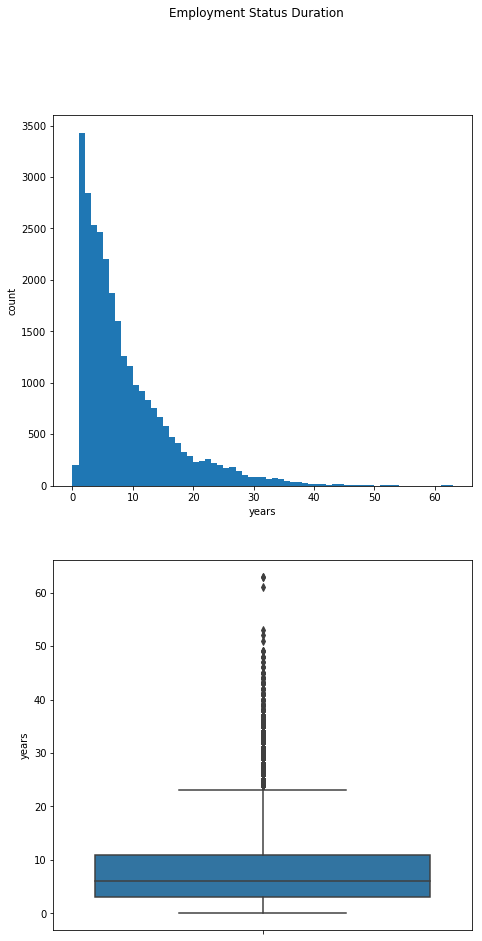

In [102]:
plt.figure(figsize=(7.5,15))
plt.suptitle('Employment Status Duration')

#Hitsogram
plt.subplot(2,1,1)
bin_edges = np.arange(0, prosper_df.EmploymentStatusDuration.max()+0.1, 1)
plt.hist(prosper_df.EmploymentStatusDuration,bins=bin_edges)
plt.xlabel("years")
plt.ylabel("count")

#Box Plot
plt.subplot(2,1,2)
sb.boxplot(data = prosper_df, y = 'EmploymentStatusDuration')
plt.ylabel("years");

The distribution is a right skewed distribution. 
Most of the values are between 1 to 25 years, with 50% between 5-12.
Extreme outliers values at 40 years and more.

## DebtToIncomeRatio

In [136]:
prosper_df.DebtToIncomeRatio.describe()

count    25056.000000
mean         0.251897
std          0.390738
min          0.000000
25%          0.130000
50%          0.200000
75%          0.300000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

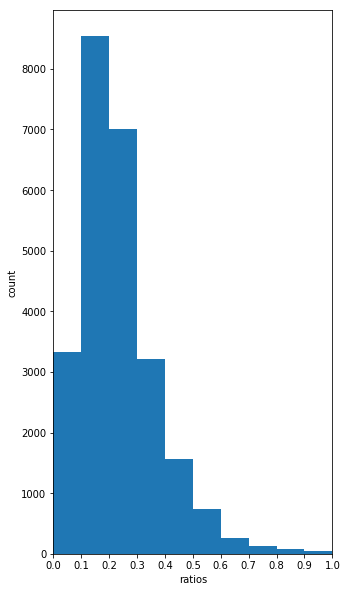

In [155]:
plt.figure(figsize=(5,10))

#Hitsogram
bin_edges = np.arange(0, prosper_df.DebtToIncomeRatio.max()+0.1, 0.1)
plt.hist(prosper_df.DebtToIncomeRatio,bins=bin_edges)
plt.xlabel("ratios")
plt.ylabel("count")
plt.xlim(0,1) #values after 1 are outliers
plt.xticks(np.arange(0,1+0.1,0.1));

In [25]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28252 entries, 12 to 113935
Data columns (total 11 columns):
LoanStatus                  28252 non-null object
BorrowerAPR                 28252 non-null float64
ProsperRatingNum            28252 non-null float64
ProsperRating               28252 non-null object
LoanOriginalAmount          28252 non-null int64
Term                        28252 non-null int64
IsBorrowerHomeowner         28252 non-null bool
EmploymentStatus            28252 non-null object
EmploymentStatusDuration    28243 non-null float64
DebtToIncomeRatio           25056 non-null float64
IncomeRange                 28252 non-null object
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 3.6+ MB


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!